In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
x, y = make_classification(n_samples=1200, weights=[0.8])
x_train, x_test, y_train, y_test = train_test_split(x, y)
svc = SVC(probability=True).fit(x_train, y_train)

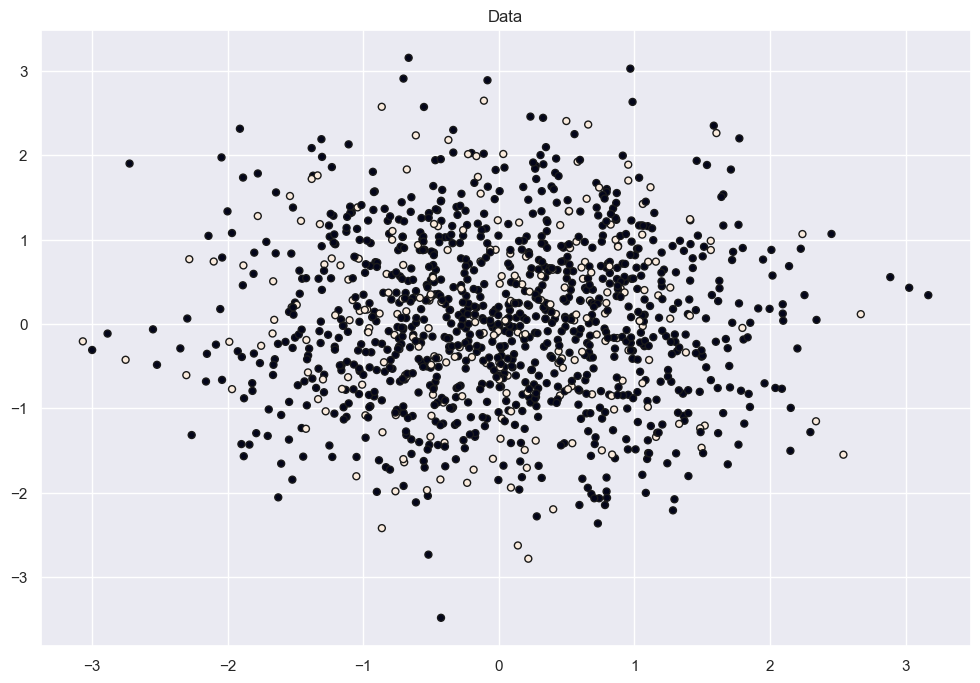

In [4]:
plt.figure(figsize=(12,8))
plt.title('Data')
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

In [5]:
def calculate_tp_fp(proba, true_label, threshold):
    
    pred = np.where(proba>=threshold, 1, 0)    
    tp = np.sum(np.logical_and(pred == 1, true_label == 1))
    fp = np.sum(np.logical_and(pred == 1, true_label == 0))     
    
    return tp, fp

In [6]:
def calculate_tpr_fpr_ppv(proba, true_label, thresholds: list):
    
    tp, fp = [list(a) for a in zip(*[calculate_tp_fp(proba, y_test, th) for th in thresholds])]
    tpr = tp/np.sum(true_label==1)
    fpr = fp/np.sum(true_label==0)
    ppv = [x / (x + y) if (x + y != 0) else 1 for x,y in zip(tp, fp)]
    
    return tpr, fpr, ppv

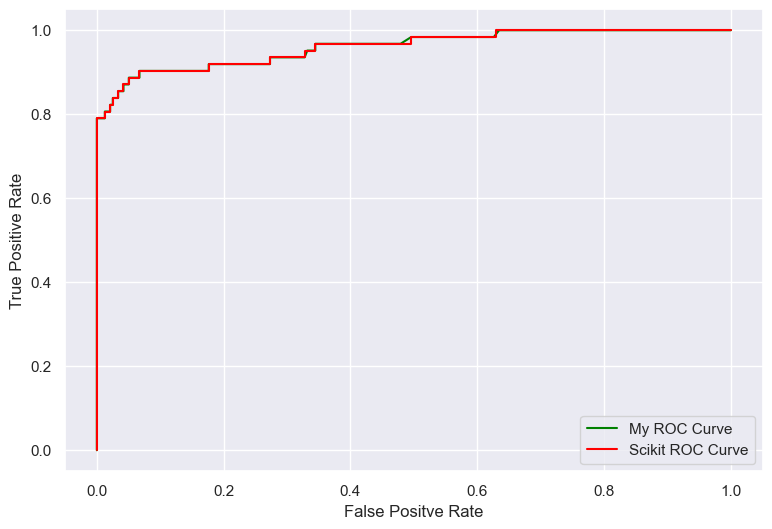

In [7]:
proba = svc.predict_proba(x_test)[:,1]
thresholds = np.linspace(0.0, 1, 1000)
tpr, fpr, ppv = calculate_tpr_fpr_ppv(proba, y_test, thresholds)
sci_fpr, sci_tpr, _ = metrics.roc_curve(y_test, proba)
sci_rec, sci_pre, _ = metrics.precision_recall_curve(y_test, proba)

plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label="My ROC Curve",color="green")
plt.plot(sci_fpr, sci_tpr, label="Scikit ROC Curve", color="red")
plt.legend(loc='best')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

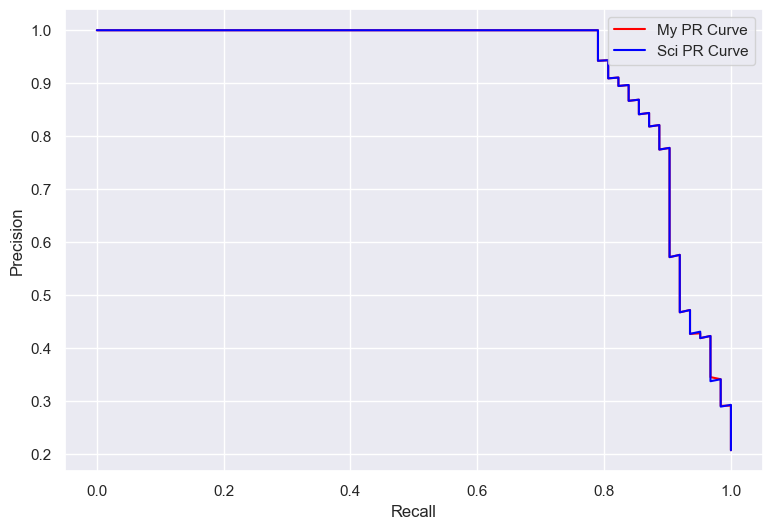

In [8]:
plt.figure(figsize=(9,6))
plt.plot(tpr, ppv, label="My PR Curve",color="red")
plt.plot(sci_pre, sci_rec, label="Sci PR Curve",color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def integrate(x, y):
    return np.sum([0.5 * np.abs(x[i + 1] - x[i]) * (y[i] + y[i + 1]) for i in range(len(x) - 1)])

In [11]:
from sklearn.metrics import auc


my_roc_area = integrate(fpr, tpr)
my_pr_area = integrate(tpr, ppv)
print("My ROC area:", my_roc_area, "  sklearn ROC area", auc(fpr, tpr))
print("My PR area", my_pr_area, "    sklearn PR area", auc(tpr, ppv))

My ROC area: 0.9597790729194905   sklearn ROC area 0.9597790729194905
My PR area 0.9286849281393289     sklearn PR area 0.9286849281393289
